In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
# physical_devices = tf.config.list_physical_devices('GPU') 
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
stream = "mock"

In [4]:
df, file = load_file(stream = stream)

../gaia_data/mock_streams/gaiamock_ra156.2_dec57.5_stream_feh-1.6_v3_863.npy


### Prepare datasets for training

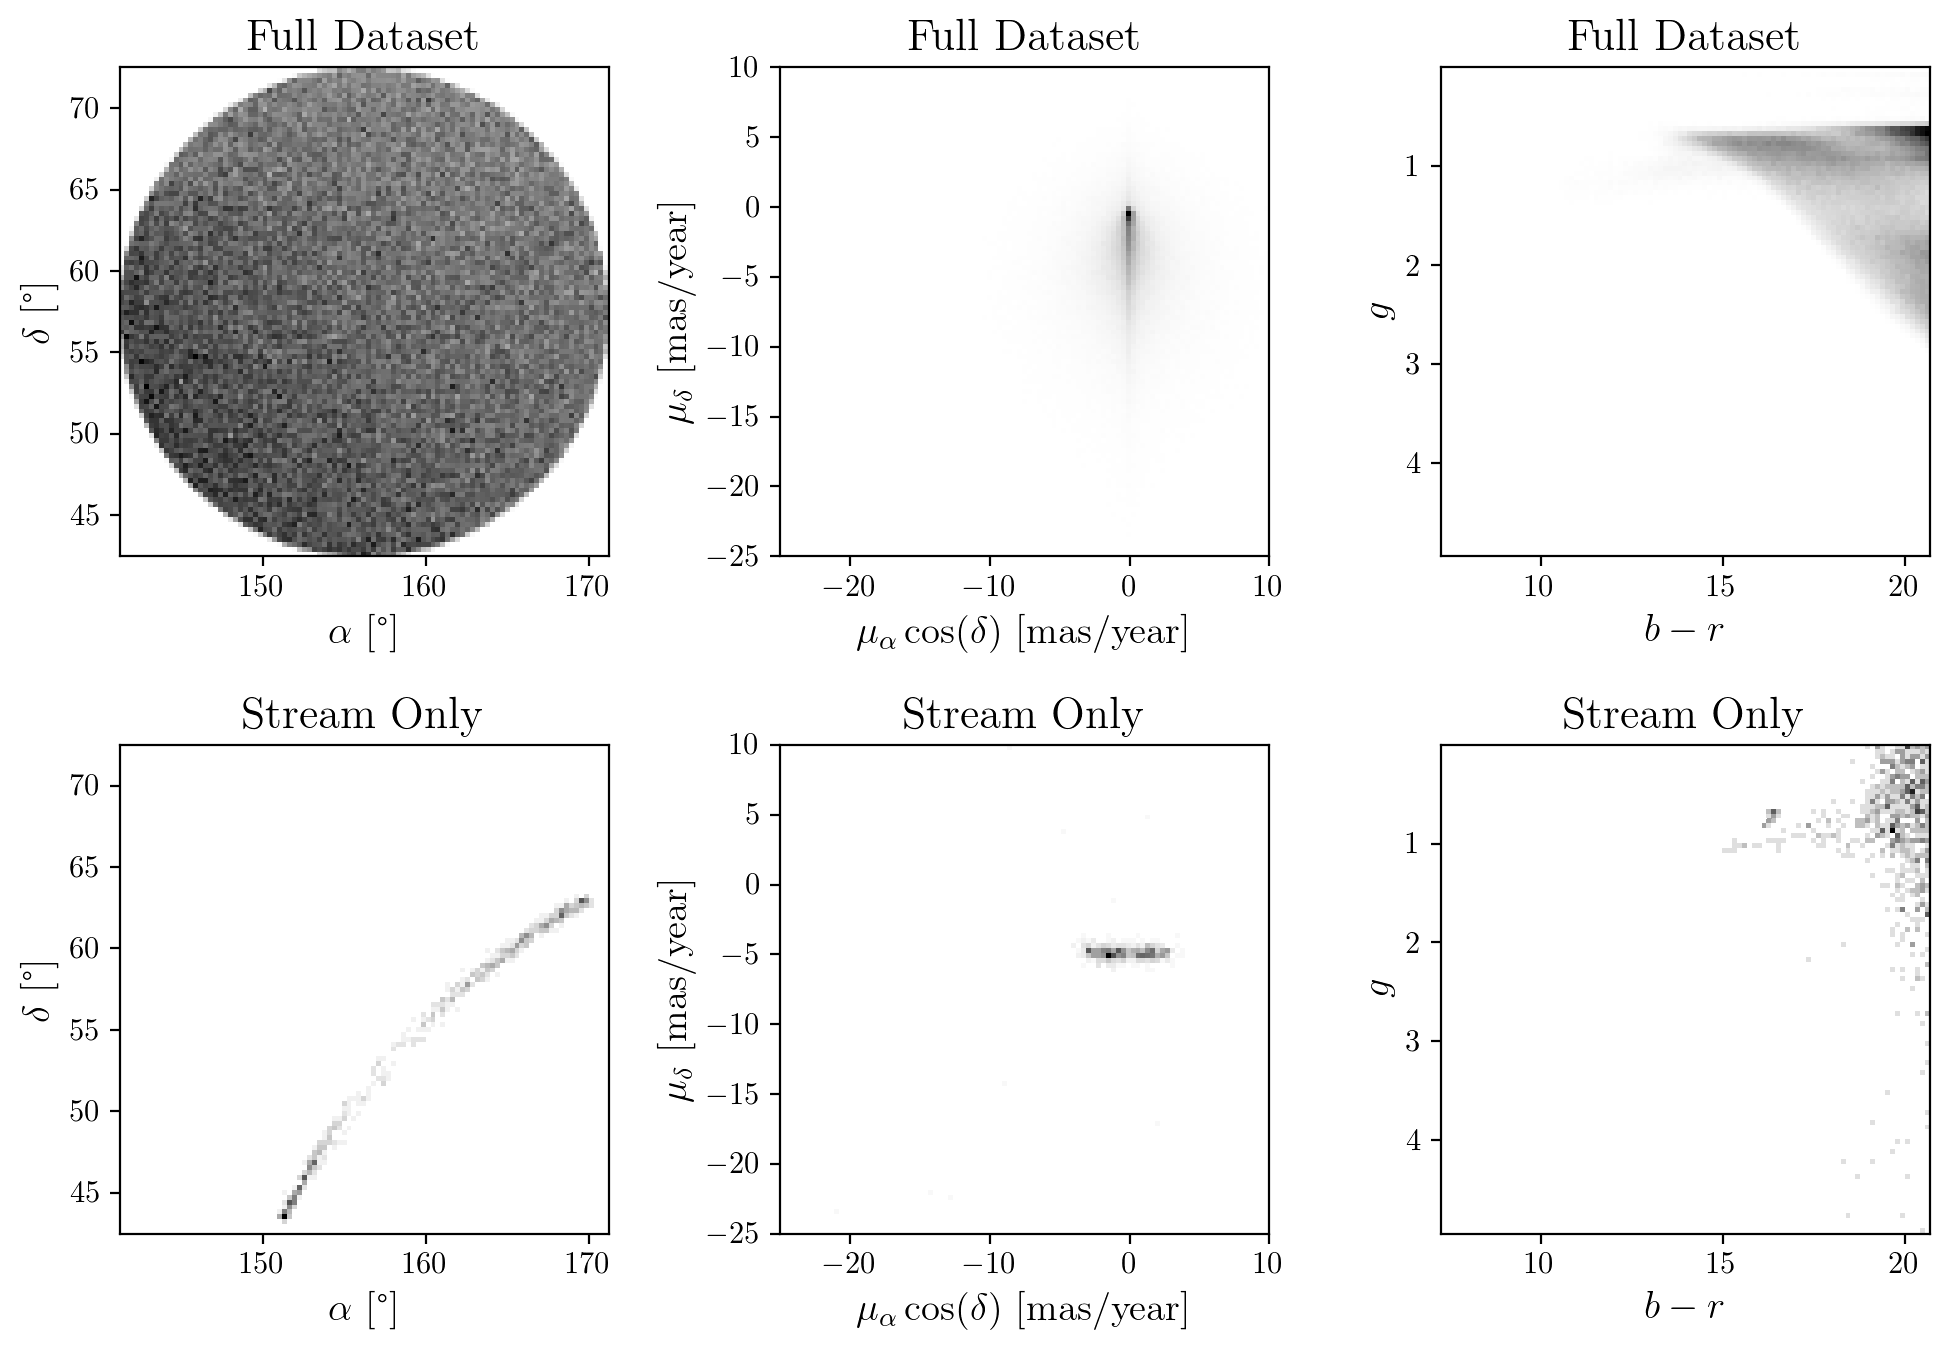

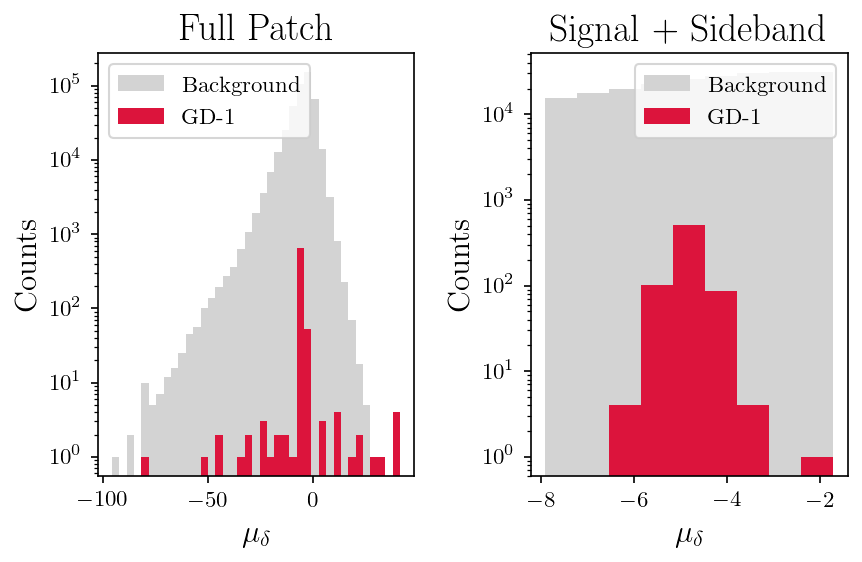

In [5]:
visualize_stream(df, save_folder="mock")

Sideband region: [-7.9,-1.7]
Signal region: [-6.4,-3.3]
Total counts: SR = 114,831, SB = 107,177
Signal region has 712 stream and 114,119 bkg events (0.62%).
Sideband region has 1 stream and 107,176 bkg events (0.00%).
f_sig = 668.7X f_sideband.


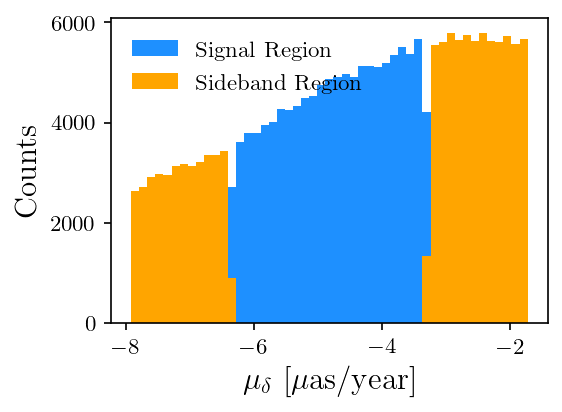

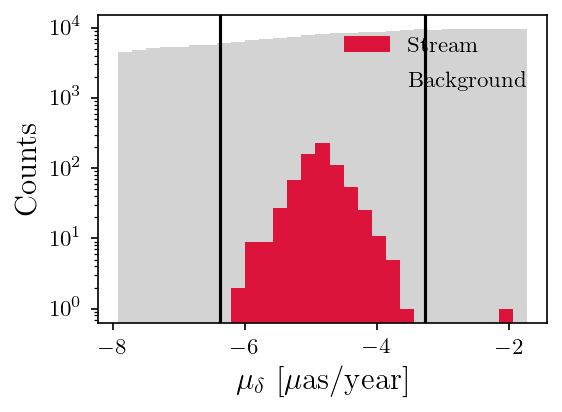

In [6]:
df = signal_sideband(df, stream = stream, save_folder = "mock")

# Train

In [7]:
print("Dataframe has {:,} stars, of which {:,} are stream stars.".format(
    len(df), 
    len(df[df.stream])))

Dataframe has 222,008 stars, of which 713 are stream stars.


[Step 1] k-fold: 100%|██████████| 5/5 [17:12<00:00, 206.60s/it]


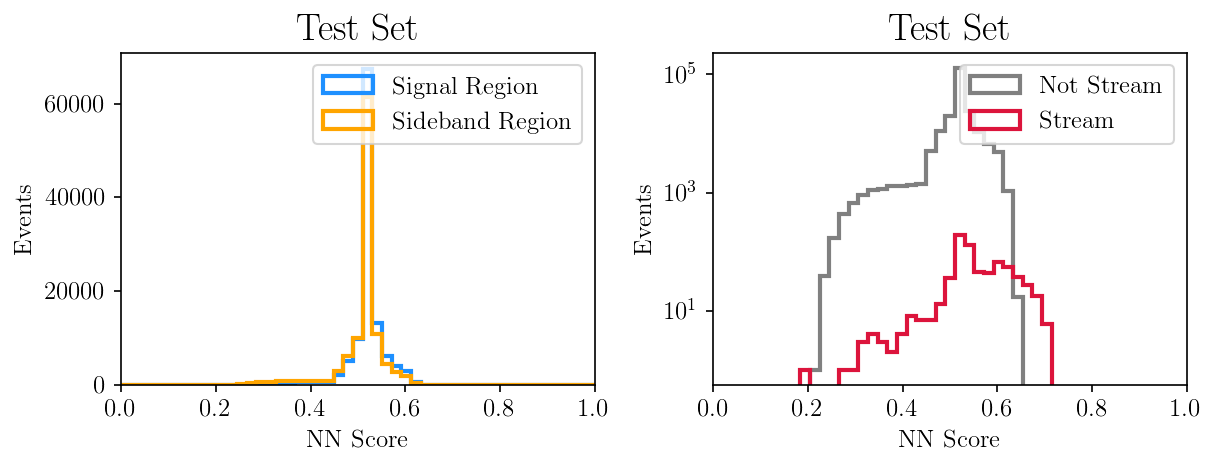

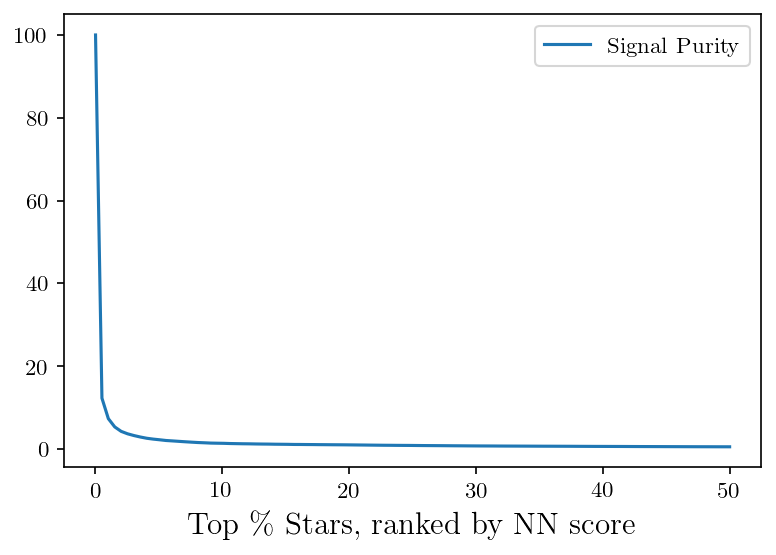

Top 50 stars: Purity = 100.0% 


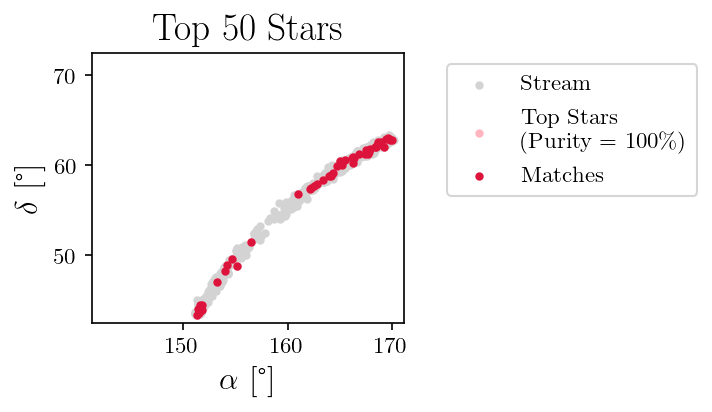

In [9]:
tf.keras.backend.clear_session()

test = train(df, 
      save_folder = "mock",
      n_folds = 5, 
      best_of_n_loops = 3,
      layer_size = 32, 
      batch_size = 10000,
      dropout = 0.2, 
      epochs = 100, 
      patience = 30,
      verbose = False,
            )